https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice/data?select=aug_test.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("aug_train.csv")
test = pd.read_csv("aug_test.csv")

In [3]:
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

In [5]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...
382149,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


In [6]:
train["Vehicle_Damage"].value_counts()

Vehicle_Damage
No     198501
Yes    183653
Name: count, dtype: int64

In [7]:
train["Vehicle_Age"].value_counts()

Vehicle_Age
1-2 Year     200176
< 1 Year     166353
> 2 Years     15625
Name: count, dtype: int64

In [10]:
train.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [12]:
train["Response"].value_counts()

Response
0    319553
1     62601
Name: count, dtype: int64

In [4]:
train["Vehicle_Age"] = train["Vehicle_Age"].map({"< 1 Year" : 0, "> 2 Years" : 2, "1-2 Year" : 1})
test["Vehicle_Age"] = test["Vehicle_Age"].map({"< 1 Year" : 0, "> 2 Years" : 2, "1-2 Year" : 1})

train["Vehicle_Damage"] = train["Vehicle_Damage"].map({"Yes" : 1, "No" : 0})
test["Vehicle_Damage"] = test["Vehicle_Damage"].map({"Yes" : 1, "No" : 0})

train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22,1,7.0,1,0,0,2630.0,152.0,16,0
1,Male,42,1,28.0,0,1,1,43327.0,26.0,135,0
2,Female,66,1,33.0,0,1,1,35841.0,124.0,253,0
3,Female,22,1,33.0,0,0,0,27645.0,152.0,69,0
4,Male,28,1,46.0,1,0,0,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...
382149,Male,24,1,15.0,0,0,1,23938.0,152.0,105,0
382150,Male,27,1,28.0,1,0,0,336395.0,152.0,144,0
382151,Male,45,1,28.0,0,1,1,40443.0,26.0,187,0
382152,Female,28,1,28.0,1,0,0,25380.0,152.0,208,0


In [5]:
train = pd.get_dummies(train, drop_first = True)
test = pd.get_dummies(test, drop_first = True)

In [6]:
train["Gender_Male"] = train["Gender_Male"].map({True : 1, False : 0})

In [7]:
test["Gender_Male"] = test["Gender_Male"].map({True : 1, False : 0})

In [8]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("Response", axis = 1), train["Response"], test_size = 0.1, random_state = 22)

In [28]:
estimators = [
    ("lrcv", LogisticRegressionCV()),
    ("gbc", GradientBoostingClassifier()),
    ("hgbc", HistGradientBoostingClassifier()),
    ("rfc", RandomForestClassifier()),
    ("abc", AdaBoostClassifier()),
    ("etc", ExtraTreesClassifier()),
    ("bc", BaggingClassifier()),
    ("xgbc", XGBClassifier()),
    ("lgbm", LGBMClassifier()),
    ("catboost", CatBoostClassifier()),
    ("eec", EasyEnsembleClassifier()),
    ("rbc", RUSBoostClassifier()),
    ("bbc", BalancedBaggingClassifier()),
    ("rbfc", BalancedRandomForestClassifier()),
    ("brrc", BalancedRandomForestClassifier())
]

In [29]:
vc = VotingClassifier(estimators = estimators, voting = "soft", n_jobs = -1)

In [30]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('lrcv', LogisticRegressionCV()),
                             ('gbc', GradientBoostingClassifier()),
                             ('hgbc', HistGradientBoostingClassifier()),
                             ('rfc', RandomForestClassifier()),
                             ('abc', AdaBoostClassifier()),
                             ('etc', ExtraTreesClassifier()),
                             ('bc', BaggingClassifier()),
                             ('xgbc',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            c...
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm', LGBMClassifier()),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x0000018DA490FC50>),
                             ('eec', EasyEnsembleClassifier()),
                             ('rbc', RUSBoostClassifier()),
                             ('bbc', BalancedBaggingClassifier()),
                             ('rbfc', BalancedRandomForestClassifier()),
                             ('brrc', BalancedRandomForestClassifier())],
                 n_jobs=-1, voting='soft')

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

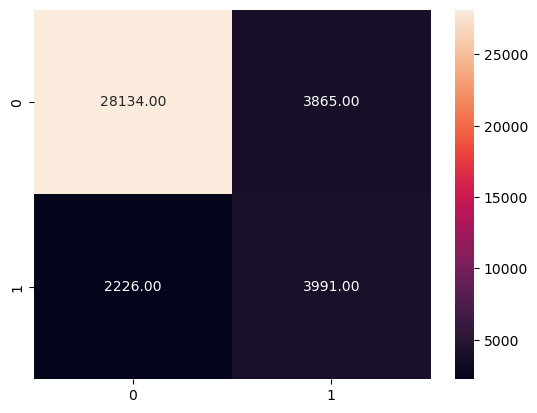

In [33]:
sns.heatmap(confusion_matrix(y_test, vc.predict(X_test)), annot = True, fmt = ".2f")

In [42]:
estimators_other = [
    ("eec", EasyEnsembleClassifier(n_estimators = 200, n_jobs = -1)),
    ("rbc", RUSBoostClassifier(n_estimators = 200)),
    ("bbc", BalancedBaggingClassifier(n_estimators = 200, n_jobs = -1)),
    ("brfc", BalancedRandomForestClassifier(n_estimators = 200, n_jobs = -1))
]

In [43]:
vc_other = VotingClassifier(n_jobs = -1, estimators = estimators_other)
vc_other.fit(X_train, y_train)

VotingClassifier(estimators=[('eec',
                              EasyEnsembleClassifier(n_estimators=200,
                                                     n_jobs=-1)),
                             ('rbc', RUSBoostClassifier(n_estimators=200)),
                             ('bbc',
                              BalancedBaggingClassifier(n_estimators=200,
                                                        n_jobs=-1)),
                             ('brfc',
                              BalancedRandomForestClassifier(n_estimators=200,
                                                             n_jobs=-1))],
                 n_jobs=-1)

<Axes: >

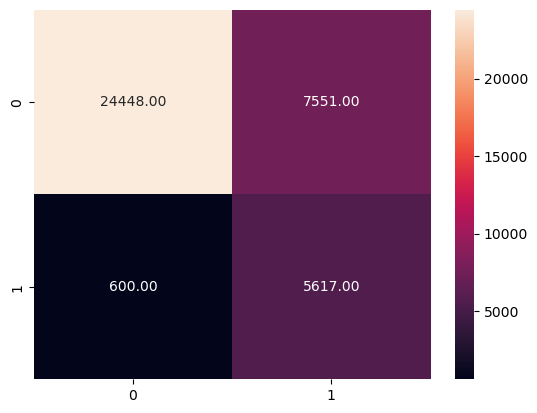

In [47]:
sns.heatmap(confusion_matrix(y_test, vc_other.predict(X_test)), annot = True, fmt = ".2f")

In [44]:
estimators_layer1 = [
        ("gbc", GradientBoostingClassifier()),
        ("hgbc", HistGradientBoostingClassifier()),
         ("xgbc", XGBClassifier()),
        ("lgbm", LGBMClassifier()),
        ("catboost", CatBoostClassifier())
]

In [48]:
layer1 = StackingClassifier(estimators = estimators_layer1, final_estimator = RUSBoostClassifier(n_estimators = 200), n_jobs = -1)

In [49]:
estimators_layer2 = [
    ("layer1", layer1),
        ("eec", EasyEnsembleClassifier(n_estimators = 100)),
    ("rbc", RUSBoostClassifier(n_estimators = 100)),
    ("bbc", BalancedBaggingClassifier(n_estimators = 100)),
    ("rbfc", BalancedRandomForestClassifier(n_estimators = 100)),
        ("rfc", RandomForestClassifier(n_estimators = 100)),
    ("abc", AdaBoostClassifier(n_estimators = 100)),
    ("etc", ExtraTreesClassifier(n_estimators = 100)),
]

In [50]:
final = StackingClassifier(estimators = estimators_layer2, final_estimator = BalancedRandomForestClassifier(n_estimators = 200, n_jobs = -1), n_jobs=-1)

In [51]:
final.fit(X_train, y_train)

E:\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
E:\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
E:\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


StackingClassifier(estimators=[('layer1',
                                StackingClassifier(estimators=[('gbc',
                                                                GradientBoostingClassifier()),
                                                               ('hgbc',
                                                                HistGradientBoostingClassifier()),
                                                               ('xgbc',
                                                                XGBClassifier(base_score=None,
                                                                              booster=None,
                                                                              callbacks=None,
                                                                              colsample_bylevel=None,
                                                                              colsample_bynode=None,
                                                                              colsample_bytree=None,
                                                                              device=None,
                                                                              early_stopping_rounds=None,
                                                                              enable_categorical=False,
                                                                              ev...
                                EasyEnsembleClassifier(n_estimators=100)),
                               ('rbc', RUSBoostClassifier(n_estimators=100)),
                               ('bbc',
                                BalancedBaggingClassifier(n_estimators=100)),
                               ('rbfc', BalancedRandomForestClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('abc', AdaBoostClassifier(n_estimators=100)),
                               ('etc', ExtraTreesClassifier())],
                   final_estimator=BalancedRandomForestClassifier(n_estimators=200,
                                                                  n_jobs=-1),
                   n_jobs=-1)

<Axes: >

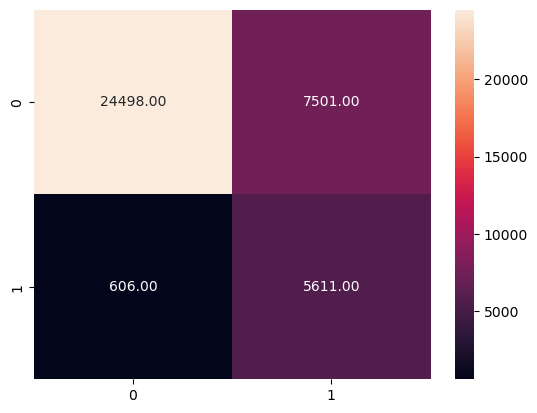

In [52]:
sns.heatmap(confusion_matrix(y_test, final.predict(X_test)), annot = True, fmt = ".2f")

In [13]:
estimators_layer2 = [
        ("eec", EasyEnsembleClassifier(n_estimators = 100)),
    ("rbc", RUSBoostClassifier()),
    ("bbc", BalancedBaggingClassifier(n_estimators = 100)),
    ("rbfc", BalancedRandomForestClassifier()),
        ("rfc", RandomForestClassifier(n_estimators = 100)),
    ("abc", AdaBoostClassifier()),
    ("etc", ExtraTreesClassifier(n_estimators = 100)),
]

In [14]:
stack = StackingClassifier(estimators = estimators_layer2, final_estimator = EasyEnsembleClassifier(), n_jobs = -1)

In [15]:
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('eec',
                                EasyEnsembleClassifier(n_estimators=100)),
                               ('rbc', RUSBoostClassifier()),
                               ('bbc',
                                BalancedBaggingClassifier(n_estimators=100)),
                               ('rbfc', BalancedRandomForestClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('abc', AdaBoostClassifier()),
                               ('etc', ExtraTreesClassifier())],
                   final_estimator=EasyEnsembleClassifier(), n_jobs=-1)

<Axes: >

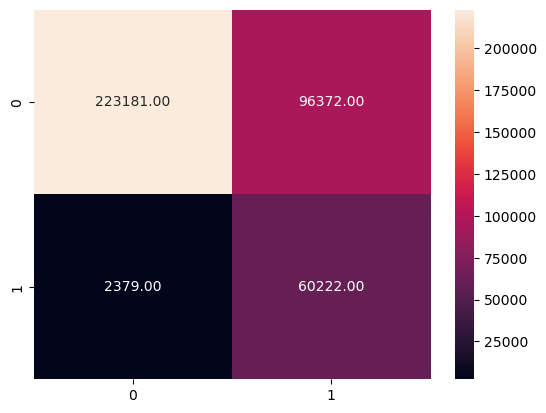

In [18]:
sns.heatmap(confusion_matrix(train["Response"], stack.predict(train.drop("Response", axis = 1))), annot = True, fmt = ".2f")

In [19]:
print(classification_report(train["Response"], stack.predict(train.drop("Response", axis = 1))))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82    319553
           1       0.38      0.96      0.55     62601

    accuracy                           0.74    382154
   macro avg       0.69      0.83      0.68    382154
weighted avg       0.89      0.74      0.77    382154

